In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                       n_clusters_per_class=2,n_redundant=0)

In [4]:
X

array([[ 2.22635144,  0.02072346],
       [ 1.1805341 , -0.34274826],
       [-1.14293194, -1.16101797],
       ...,
       [ 1.39322668, -1.85612615],
       [ 0.13237567,  1.37723162],
       [-0.4477701 , -1.72851366]])

In [5]:
y

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [6]:
pd.DataFrame(X)[0]

0      2.226351
1      1.180534
2     -1.142932
3      0.520238
4     -0.021985
         ...   
995    1.046517
996    1.061701
997    1.393227
998    0.132376
999   -0.447770
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

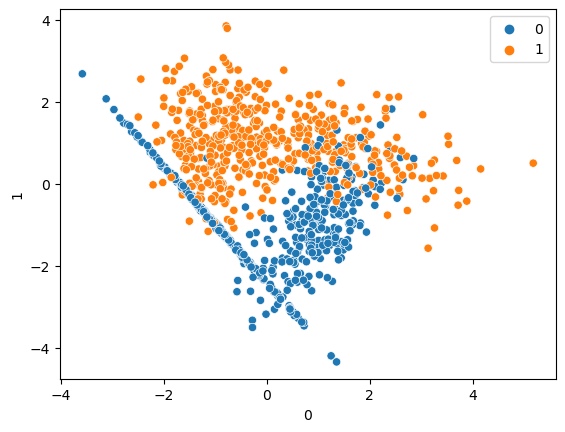

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [11]:
from sklearn.svm import SVC

In [11]:
from sklearn.svm import SVC

In [12]:
svc=SVC(kernel='linear')

In [14]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
y_pred=svc.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
accuracy_score(y_test,y_pred)

0.856

In [18]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.84      0.86       129\n           1       0.84      0.87      0.85       121\n\n    accuracy                           0.86       250\n   macro avg       0.86      0.86      0.86       250\nweighted avg       0.86      0.86      0.86       250\n'

In [19]:
confusion_matrix(y_test,y_pred)

array([[109,  20],
       [ 16, 105]])

### Hyperparameter TUning With SVC

In [20]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001]

}

In [28]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.920 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.893 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.873 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.940 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.860 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.813 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.860 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.887 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.840 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [30]:
grid.best_params_

{'C': 100, 'gamma': 0.1}

In [31]:
y_pred=grid.predict(X_test)
accuracy_score(y_test,y_pred)

0.932

In [32]:
confusion_matrix(y_test,y_pred)

array([[124,   5],
       [ 12, 109]])